Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(32, 32, 3) 119
(32, 32, 3) 115
(32, 32, 3) 144
(32, 32, 3) 129
(32, 32, 3) 119
(32, 32, 3) 203
(32, 32, 3) 218
(32, 32, 3) 167
shape of array:  (8, 32, 32, 3)
eia: (8, 3072)
max eia: 218
eia max after normalizing:  1.0
eia mean:  0.38126160974531736
eia min after: -0.3916284403669724 eia max after: 0.5590596330275229
Shape of covariance matrix:  (3072, 3072)

shape: (3072, 3072)
min: 0.0
max: 1.0


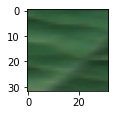

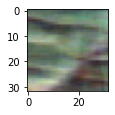


shape: (3072, 3072)
min: 0.0
max: 1.0


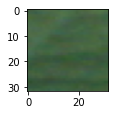

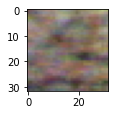

In [8]:
# -*- coding: utf-8 -*-

import os
import numpy as np 
from google.colab import drive
import cv2
import matplotlib.pyplot as plt
from glob import glob
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/')

# Specify the folder to find all images 
folder = glob("/content/patches/*")

def resize_image(img):
  return(cv2.resize(img,(32,32)))

def plotImage(X):
  plt.figure(figsize=(1.5, 1.5))
  plt.imshow(X.reshape(32,32,3))
  plt.show()
  plt.close()



# Initialize an empty list to store all the images data
eia=[]    

# loop through the folder to retrieve all images 
for file in range(len(folder)):
    img = cv2.imread(folder[file])
    img = resize_image(img)
    print(img.shape,img.max())
    eia.append(img)
eia_array = np.asarray(eia)
print("shape of array: ",eia_array.shape)


# Reshape the images/ flatten them
eia = eia_array.reshape(eia_array.shape[0],eia_array.shape[1]*eia_array.shape[2]*eia_array.shape[3])

print("eia:",eia.shape)

# normalize the data
print("max eia:",eia.max())
eia = eia / eia.max()

print("eia max after normalizing: ",eia.max())

# Subtract the mean from the normalized pixels  
print("eia mean: ", eia.mean())
eia = eia - eia.mean(axis=0)

print("eia min after:", eia.min(),"eia max after:", eia.max())
# Find the covariance of the pixels

cov = np.cov(eia,rowvar=False)
print("Shape of covariance matrix: ", cov.shape)


U,S,V = np.linalg.svd(cov)
# print( np.diag(S))
print ('\nshape:', np.diag(S).shape)

epsilon = 0.1
X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(eia.T).T
X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())
print ('min:', X_ZCA_rescaled.min())
print ('max:', X_ZCA_rescaled.max())

# Epsilon = 0.1

plotImage(eia_array[3, :])
plotImage(X_ZCA_rescaled[3, :])





\




U,S,V = np.linalg.svd(cov)
print ('\nshape:', np.diag(S).shape)

epsilon = 0.8
X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(eia.T).T
X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())
print ('min:', X_ZCA_rescaled.min())
print ('max:', X_ZCA_rescaled.max())


plotImage(eia_array[0, :])
plotImage(X_ZCA_rescaled[0, :])


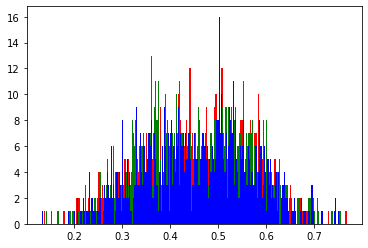

In [11]:
#Plotting channel distributions of the pre-whitened images
#Reshaping pre whitened images
X_ZCA_reshaped=np.reshape(X_ZCA_rescaled,(-1,eia_array.shape[1],eia_array.shape[2],eia_array.shape[3]))
_ = plt.hist(X_ZCA_reshaped[:, :, 0].ravel(), bins = 256, color = 'red')
_ = plt.hist(X_ZCA_reshaped[:, :, 1].ravel(), bins = 256, color = 'Green')
_ = plt.hist(X_ZCA_reshaped[:, :, 2].ravel(), bins = 256, color = 'Blue')

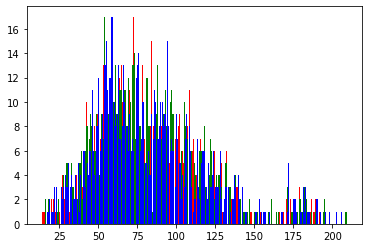

In [12]:
#Plotting channel distributions of the original images
_ = plt.hist(eia_array[:, :, 0].ravel(), bins = 256, color = 'red')
_ = plt.hist(eia_array[:, :, 1].ravel(), bins = 256, color = 'Green')
_ = plt.hist(eia_array[:, :, 2].ravel(), bins = 256, color = 'Blue')